In [2]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage #библиотека вычисляющая центр масс по заданной матрице
import time
import cv2 #чтение матрицы плотности с ихображения
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
# Загрузка изображения
density_matrix_0 = cv2.imread('density_Sochi.jpg', cv2.IMREAD_GRAYSCALE)
print(density_matrix_0)

## Нормализация значений яркости к диапазону от 0 до 1
#normalized_image = image 


[[7 6 4 ... 1 1 0]
 [7 8 9 ... 1 1 1]
 [4 6 8 ... 0 1 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
# Сохранение матрицы в файл
np.savetxt('Sochi_1000x1000.jpg', density_matrix_0)
density_matrix_0.shape

(1158, 1158)

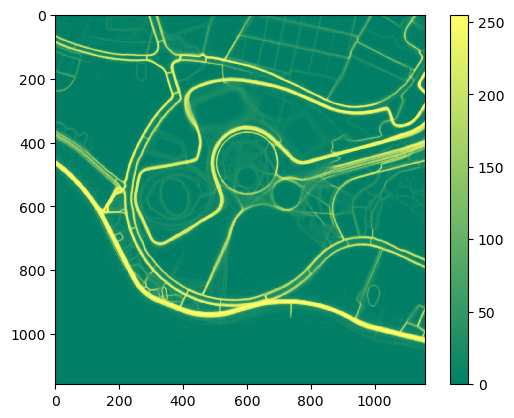

In [5]:
plt.imshow(density_matrix_0, cmap='summer', interpolation='nearest')
plt.colorbar()
plt.show()

density_matrix = np.flip(density_matrix_0,axis=0).T  #(i,j) - (x,y): инверсия строк - транспонипование ( (i,j) - (j, n-i) )


In [6]:
start_time = time.time()
k = int(5)
n = density_matrix_0.shape[0]
d = density_matrix_0.shape[0]

In [8]:
sites = np.random.rand(k,2)*n
first_sites = sites
N = int(0)
koef = d/n


In [9]:
sites = np.array([[929.10254591, 305.84600835],
 [941.70640706, 791.39842129],
 [465.06616122, 352.20590688],
 [435.44132275, 924.21663652],
 [196.54375174, 590.8830492 ]])


In [10]:
def build_site_index_matrix(sites,size,koef):

    site_index_matrix = np.zeros((size, size), dtype=int)
    
    for i in range(size):
        for j in range(size):
            m_dist = np.array([])
            
            for k, site in enumerate(sites):
                dist = np.linalg.norm(np.array([i, j])*koef - site)
                m_dist = np.append(m_dist, dist)
                
            #print(m_dist)
            #print(np.argmin(m_dist)
            
            if np.count_nonzero(m_dist == np.min(m_dist)) == 1:   
                site_index_matrix[i][j] = np.argmin(m_dist)+1 #+1 чтобы потом можно было работать с нулевой матрицей

            
    #из -за того, что Декартова СК и порядок столбцов и строк в матрице различаются, то для соответсвия(визуального)
    #нам необходимо сначала отобразить строки относительно оси симметрии(см. пример), а потом транспонировать полученную матрицу
    #print(np.flip(site_index_matrix.T,axis=0))
    
    #но выводим мы полученную матрицу, где координате Х и Y соответствуют номера строк и столбцов соответственно
    #print("Матрица, соответствующая диаграмме")
    return site_index_matrix

In [11]:
def search_new_sites(sites, density_matrix, site_index_matrix, koef):
    new_sites = np.empty((0, sites.shape[1]))
    k_cm = np.empty((1,2))
    k_density = np.zeros((density_matrix.shape[0], density_matrix.shape[1]), dtype=int)
    
    
    for  k, site in enumerate(sites):
        k_site_index_matrix = np.zeros((density_matrix.shape[0], density_matrix.shape[1]), dtype=int)
        k_site_index_matrix[site_index_matrix == (k+1)] = 1 #создаем маску для матрицы плотностей
            
        #print(k_site_index_matrix)
        #почленно перемножаем матрицы, тем самым учитывая элементы, входящие в нужный нам регион
        k_density = k_site_index_matrix * density_matrix
        
        #все ячейки плотности нулевые - не сдвигаем наш сайт
        if np.all(k_density == 0): 
            k_cm = site
        else:
            #находим координаты центра масс и добавляем его в список наших новых сайтов
            k_cm = np.array(ndimage.center_of_mass(k_density))
        
        new_sites = np.vstack([new_sites, k_cm])
    
    return np.array(new_sites)*koef


#new_sites = search_new_sites(sites, density_matrix, site_index_matrix,koef)
#print("\n previos sites:\n", sites,"\nnew sites:")
#print(new_sites)

In [12]:
def visual(sites, density_m):
    vor = Voronoi(sites)
    fig = voronoi_plot_2d(vor, point_size=10, point_style='ro')
    #plt.figure(figsize=(density_matrix_0.shape[0]/100, density_matrix_0.shape[1]/100))
    
    density_m = np.flip(density_m, axis = 0)
    
    plt.imshow(density_m, cmap='summer', interpolation='nearest', alpha = 0.7)
    plt.colorbar()
    plt.title(N)
    
    #plt.gcf().set_size_inches(4, 4)
    plt.show()

print number of iterations:2
equal
1


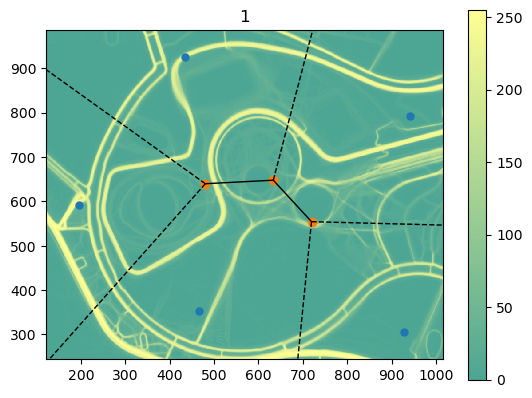

In [13]:
itter = int(input("print number of iterations:"))
for i in range(itter):
    site_index_matrix = build_site_index_matrix(sites,d, koef)
    new_sites = search_new_sites(sites, density_matrix, site_index_matrix,koef)
    
        # Указываем допустимую абсолютную погрешность 0.01
    if np.allclose(sites, new_sites, atol=0.01):
        print("equal")
        N+=1
        print(N)
        visual(new_sites, density_matrix_0)
        break
      
    sites = new_sites
    if N%5==0:
        print(N)
        print(time.time() - start_time)
        
    if N%10 == 0:
        visual(new_sites, density_matrix_0)
        
    N+=1    

In [14]:
end_time = time.time()
otvet = end_time - start_time
print(otvet)

258.68515849113464


In [15]:
print(new_sites)

[[929.10254591 305.84600835]
 [941.70448197 791.39846701]
 [465.06616122 352.20590688]
 [435.43553087 924.21783209]
 [196.54551679 590.87837506]]


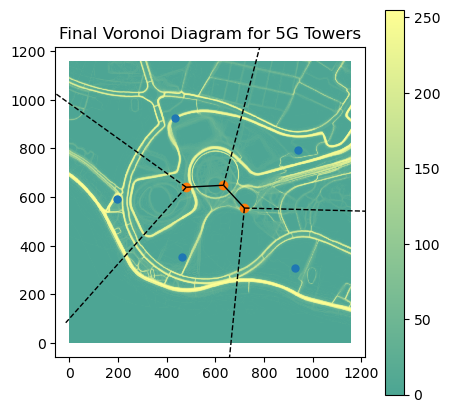

1


In [16]:
vor = Voronoi(sites)

fig = voronoi_plot_2d(vor, line_width = 1, point_size=10, point_style='ro')

plt.imshow(density_matrix.T, cmap='summer', interpolation='nearest', alpha = 0.7)
plt.colorbar()
plt.title("Final Voronoi Diagram for 5G Towers")
plt.xlim(-0.05 * n, n+0.05*n)
plt.ylim(-0.05 * n, n+0.05*n)

plt.gcf().set_size_inches(5, 5)
plt.show()
print(N)

1


<Figure size 1158x1158 with 0 Axes>

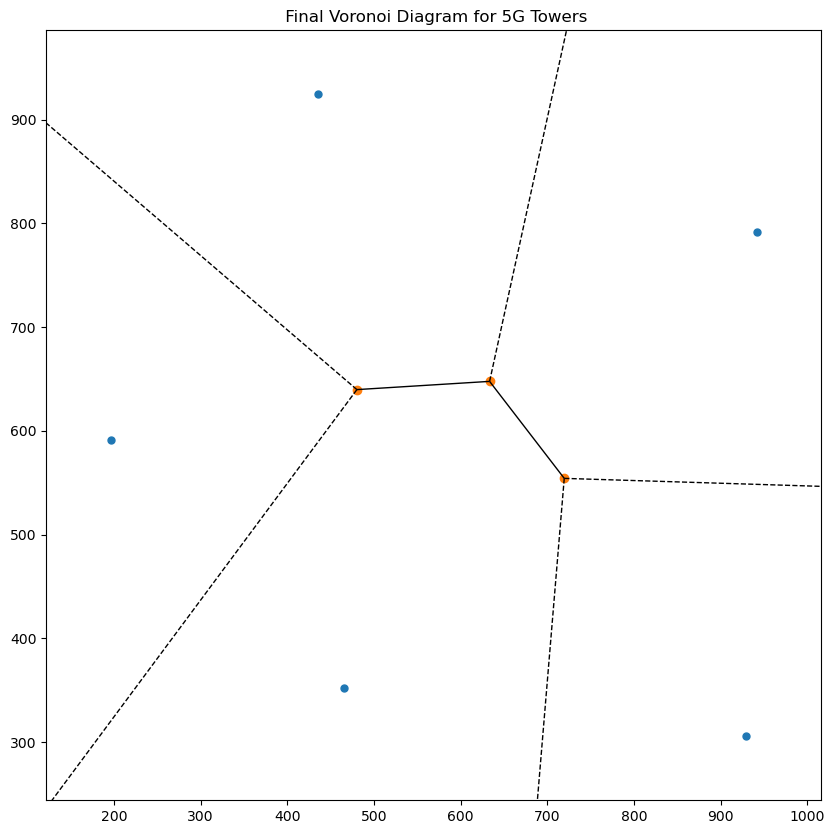

In [17]:
vor = Voronoi(sites)

# Установка размера фигуры на основе размера плотности
plt.figure(figsize=(d/100, d/100))

fig = voronoi_plot_2d(vor, line_width = 1, point_size=10, point_style='ro')

# Загрузка JPEG-изображения
img = plt.imread('Map_real.jpg')

# Отображение изображения поверх диаграммы Вороного
plt.imshow(img, extent=[0, 10, 0, 10], aspect='auto')

# Наложение изображения плотности
#plt.imshow(density_matrix_0, cmap='hot', interpolation='nearest', origin='lower', extent=extent, alpha=0.5)
#plt.colorbar()
plt.title(" Final Voronoi Diagram for 5G Towers")
plt.gcf().set_size_inches(10, 10)

vor = Voronoi(sites)
print(N)